# Importing Libraries

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [22]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.3.0
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.w

# Importing Dataset

In [3]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [6]:
data['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [27]:
percentage_of_type2excludingtype1=(35346/213703)*100
percentage_of_type2excludingtype1

16.539777167377153

<Axes: xlabel='Diabetes_012', ylabel='count'>

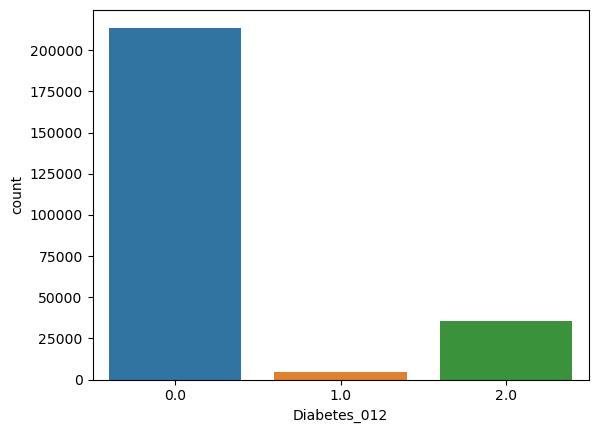

In [4]:
sns.countplot(x=data['Diabetes_012'],alpha=1)

In [17]:
data = data.astype(int)
data = data[0:50000]

In [30]:
data['Diabetes_012'].value_counts()

0    42071
2     6884
1     1045
Name: Diabetes_012, dtype: int64

In [29]:
percentage_after_sampling50000=(6884/42071)*100
percentage_after_sampling50000

16.362815240902286

### Predicting only Type 2 or No Diabetes

In [8]:
data=data[(data['Diabetes_012'] != 1.0)]
data['Diabetes_012'].count()

0    42071
2     6884
Name: Diabetes_012, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48955 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          48955 non-null  int32
 1   HighBP                48955 non-null  int32
 2   HighChol              48955 non-null  int32
 3   CholCheck             48955 non-null  int32
 4   BMI                   48955 non-null  int32
 5   Smoker                48955 non-null  int32
 6   Stroke                48955 non-null  int32
 7   HeartDiseaseorAttack  48955 non-null  int32
 8   PhysActivity          48955 non-null  int32
 9   Fruits                48955 non-null  int32
 10  Veggies               48955 non-null  int32
 11  HvyAlcoholConsump     48955 non-null  int32
 12  AnyHealthcare         48955 non-null  int32
 13  NoDocbcCost           48955 non-null  int32
 14  GenHlth               48955 non-null  int32
 15  MentHlth              48955 non-null  int32
 16  Phys

In [12]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,...,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000
mean,0.281238,0.420039,0.418303,0.964682,27.811541,0.444265,0.041875,0.089552,0.777122,0.647227,...,0.947544,0.089409,2.481401,3.229027,4.242856,0.165090,0.438689,8.068594,5.102094,6.107486
std,0.695263,0.493570,0.493285,0.184585,6.087921,0.496889,0.200306,0.285541,0.416181,0.477838,...,0.222948,0.285336,1.082153,7.408965,8.675082,0.371266,0.496232,3.102983,1.003790,2.095848
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
data.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.272688,0.203510,0.060209,0.240004,0.055189,0.109637,0.169473,-0.125761,-0.042735,...,0.013998,0.030584,0.299089,0.068219,0.171366,0.225938,0.023454,0.177096,-0.136152,-0.166118
HighBP,0.272688,1.000000,0.291424,0.089966,0.236613,0.104996,0.134079,0.209086,-0.126390,-0.043647,...,0.035764,0.011820,0.303740,0.057215,0.162398,0.231561,0.049562,0.338987,-0.133849,-0.162010
HighChol,0.203510,0.291424,1.000000,0.078576,0.117005,0.086702,0.093338,0.173474,-0.087651,-0.045837,...,0.048888,0.004512,0.209469,0.063790,0.122412,0.145590,0.032507,0.263631,-0.057702,-0.071054
CholCheck,0.060209,0.089966,0.078576,1.000000,0.034505,-0.011329,0.019007,0.037530,0.004426,0.020625,...,0.125238,-0.064930,0.037464,-0.014937,0.030398,0.038882,-0.021076,0.082727,0.006672,0.024703
BMI,0.240004,0.236613,0.117005,0.034505,1.000000,0.013241,0.026858,0.064891,-0.161902,-0.093545,...,-0.016600,0.069603,0.261641,0.090078,0.133167,0.218804,0.046205,-0.037009,-0.134779,-0.118040
Smoker,0.055189,0.104996,0.086702,-0.011329,0.013241,1.000000,0.060187,0.107742,-0.087087,-0.065777,...,-0.016988,0.040695,0.146222,0.082953,0.108465,0.112995,0.091458,0.145274,-0.130338,-0.104112
Stroke,0.109637,0.134079,0.093338,0.019007,0.026858,0.060187,1.000000,0.210153,-0.079907,-0.019169,...,0.009393,0.037782,0.174919,0.075877,0.154682,0.181996,-0.005407,0.123356,-0.070232,-0.125750
HeartDiseaseorAttack,0.169473,0.209086,0.173474,0.037530,0.064891,0.107742,0.210153,1.000000,-0.087821,-0.022074,...,0.025981,0.030094,0.244503,0.074928,0.174837,0.209693,0.078539,0.210337,-0.077938,-0.127258
PhysActivity,-0.125761,-0.126390,-0.087651,0.004426,-0.161902,-0.087087,-0.079907,-0.087821,1.000000,0.138351,...,0.038670,-0.063898,-0.275561,-0.127488,-0.225966,-0.269127,0.038430,-0.084097,0.196174,0.195169
Fruits,-0.042735,-0.043647,-0.045837,0.020625,-0.093545,-0.065777,-0.019169,-0.022074,0.138351,1.000000,...,0.023408,-0.046432,-0.105444,-0.067172,-0.049372,-0.050421,-0.082689,0.060820,0.096171,0.074884


<Axes: >

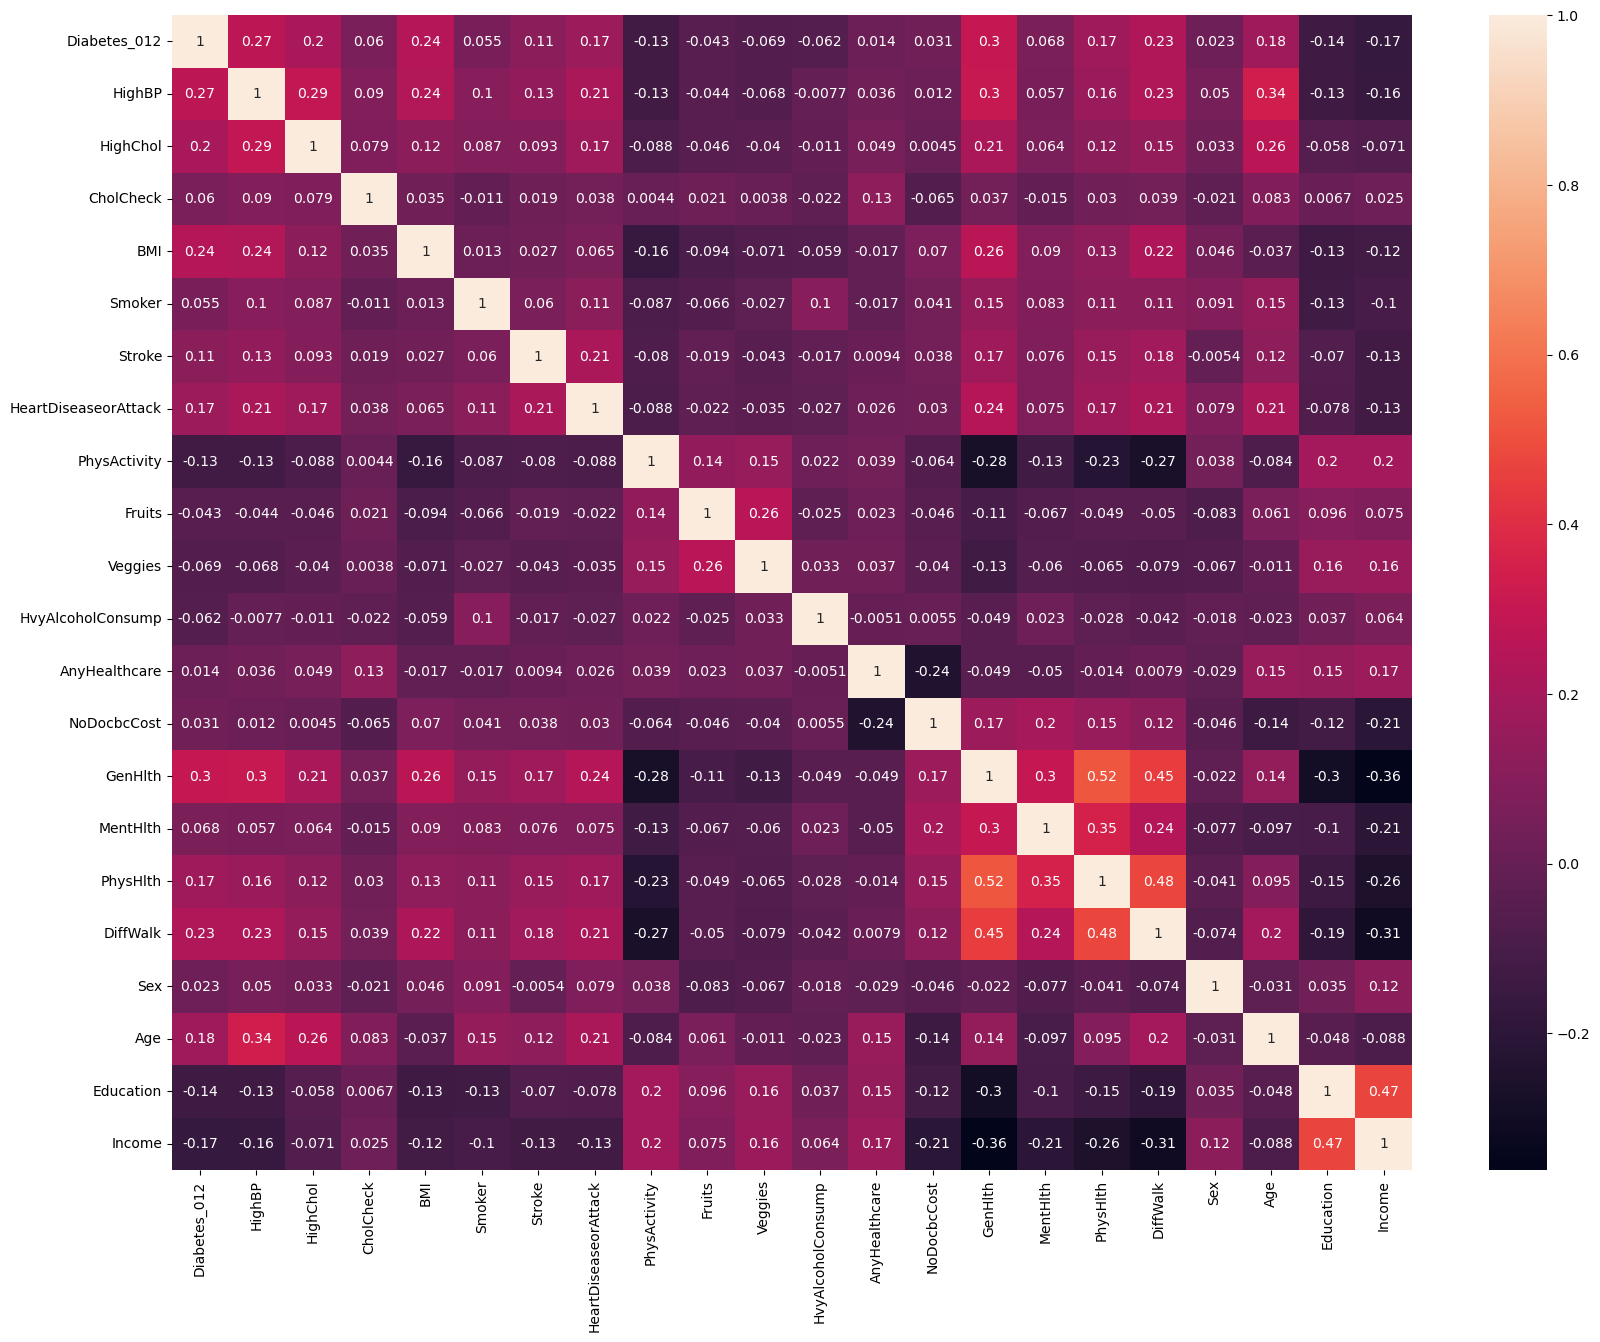

In [14]:
f, ax = plt.subplots(1, figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

In [15]:
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

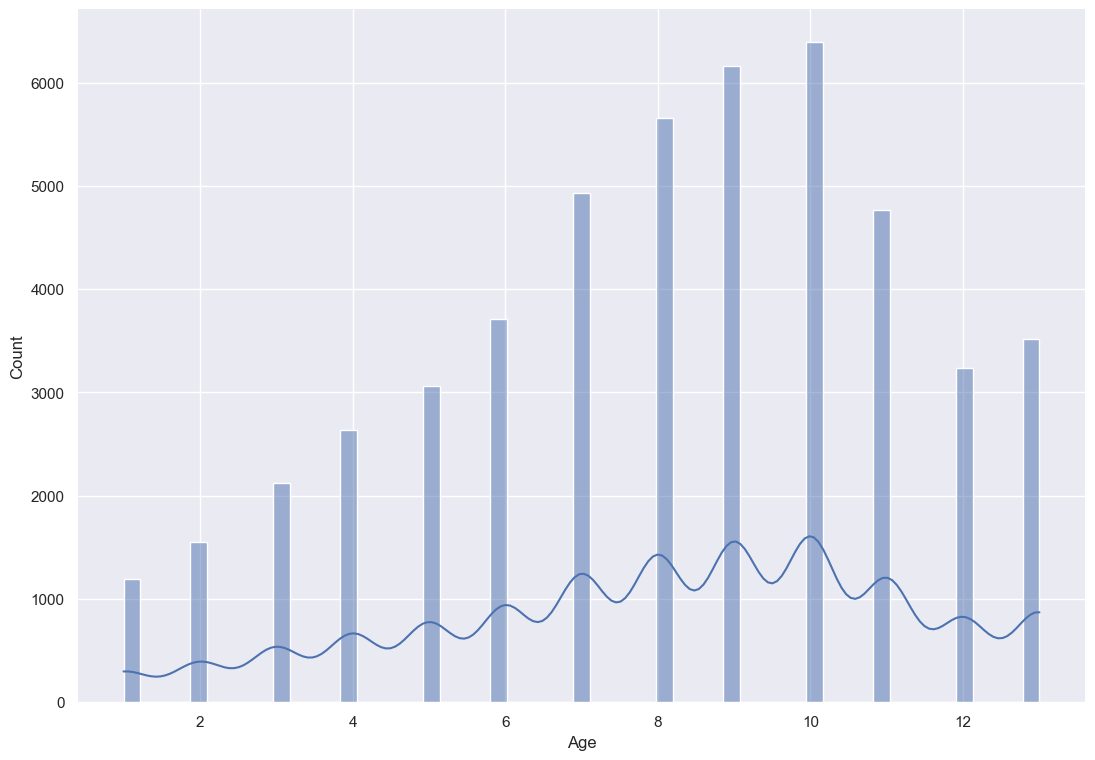

In [20]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.histplot(data['Age'],kde=True)





#Age(1-13) refers to different levels of Age

<Axes: xlabel='Diabetes_012', ylabel='count'>

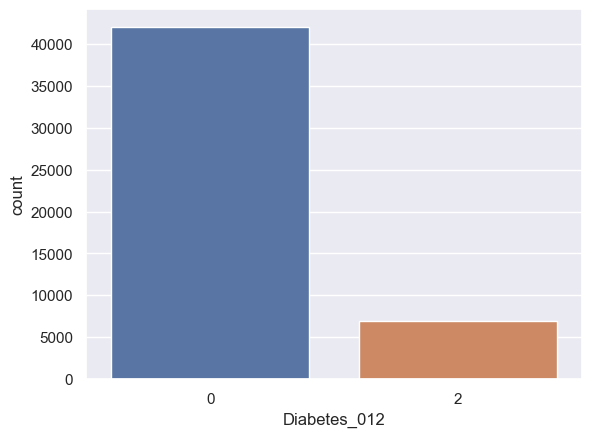

In [26]:
sns.countplot(x=data['Diabetes_012'],alpha=1)

# Feature Selection

In [27]:
Y = data['Diabetes_012']
X = data.drop('Diabetes_012',axis=1)

In [208]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
43355,1,1,1,22,0,0,0,1,1,1,...,1,0,1,0,0,0,1,10,5,4
21869,1,0,1,31,1,0,0,1,1,1,...,1,0,3,12,0,0,1,8,4,8
26161,0,0,1,27,0,0,0,1,0,1,...,1,0,2,0,0,0,0,8,6,8
15820,0,0,1,31,0,0,0,1,1,1,...,1,0,1,0,0,0,1,4,4,7
9044,0,1,1,30,0,0,0,0,1,1,...,1,0,1,0,0,0,0,9,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,0,0,1,19,0,0,0,0,0,0,...,1,0,3,3,2,0,0,13,4,6
49946,1,1,1,26,0,0,0,1,0,0,...,1,1,3,0,0,0,0,8,5,8
49965,1,0,1,21,0,0,0,1,1,1,...,1,0,4,0,30,1,0,7,6,8
49971,1,0,1,27,0,0,0,1,1,1,...,1,0,3,1,0,0,1,7,6,8


In [209]:
Y

43355    0
21869    0
26161    0
15820    0
9044     0
        ..
49944    2
49946    2
49965    2
49971    2
49982    2
Name: Diabetes_012, Length: 13768, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [85]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [86]:
evaluate(DT,X_train, X_test, y_train, y_test)


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33622     0]
 [ 5542     0]]
ACCURACY SCORE:
0.8585
CLASSIFICATION REPORT:
                      0       2  accuracy     macro avg  weighted avg
precision      0.858492     0.0  0.858492      0.429246      0.737009
recall         1.000000     0.0  0.858492      0.500000      0.858492
f1-score       0.923859     0.0  0.858492      0.461929      0.793126
support    33622.000000  5542.0  0.858492  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8449    0]
 [1342    0]]
ACCURACY SCORE:
0.8629
CLASSIFICATION REPORT:
                     0       2  accuracy    macro avg  weighted avg
precision     0.862935     0.0  0.862935     0.431468      0.744657
recall        1.000000     0.0  0.862935     0.500000      0.862935
f1-score      0.926425     0.0  0.862935     0.463213      0.799445
support    8449.000000  1342.0  0.862935  9791.000000   9791.000000


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
y_pred = DT.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(DT, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.85484489 0.85995149 0.86276012 0.86097281 0.85393258]
Average score: 0.86


# SVM

In [62]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [63]:
evaluate(SVM,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33620     2]
 [ 5542     0]]
ACCURACY SCORE:
0.8584
CLASSIFICATION REPORT:
                      0       2  accuracy     macro avg  weighted avg
precision      0.858485     0.0  0.858441      0.429243      0.737003
recall         0.999941     0.0  0.858441      0.499970      0.858441
f1-score       0.923829     0.0  0.858441      0.461915      0.793101
support    33622.000000  5542.0  0.858441  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8448    1]
 [1342    0]]
ACCURACY SCORE:
0.8628
CLASSIFICATION REPORT:
                     0       2  accuracy    macro avg  weighted avg
precision     0.862921     0.0  0.862833     0.431461      0.744645
recall        0.999882     0.0  0.862833     0.499941      0.862833
f1-score      0.926367     0.0  0.862833     0.463183      0.799394
support    8449.000000  1342.0  0.862833  9791.000000   9791.000000


In [64]:
y_pred = SVM.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100 
r1 = recall_score(y_test,y_pred,average='macro') * 100


In [65]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(SVM, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.85484489 0.85995149 0.86276012 0.86097281 0.85406027]
Average score: 0.86


# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
evaluate(RF,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33613     9]
 [   77  5465]]
ACCURACY SCORE:
0.9978
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.997714     0.998356  0.997804      0.998035      0.997805
recall         0.999732     0.986106  0.997804      0.992919      0.997804
f1-score       0.998722     0.992193  0.997804      0.995458      0.997798
support    33622.000000  5542.000000  0.997804  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8210  239]
 [1095  247]]
ACCURACY SCORE:
0.8638
CLASSIFICATION REPORT:
                     0            2  accuracy    macro avg  weighted avg
precision     0.882321     0.508230  0.863752     0.695276      0.831047
recall        0.971713     0.184054  0.863752     0.577883      0.863752
f1-score      0.924862     0.270241  0.863752     0.597551      0.835137
support    8449.000000  1342.000000  0.863752  9791.000000   9791.000000


In [68]:
y_pred = RF.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100


In [69]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(RF, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.85484489 0.86199413 0.86301545 0.86148347 0.85623085]
Average score: 0.86


# Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [71]:
evaluate(NB,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27297  6325]
 [ 2357  3185]]
ACCURACY SCORE:
0.7783
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.920517     0.334911  0.778317      0.627714      0.837649
recall         0.811879     0.574702  0.778317      0.693291      0.778317
f1-score       0.862792     0.423200  0.778317      0.642996      0.800586
support    33622.000000  5542.000000  0.778317  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[6854 1595]
 [ 586  756]]
ACCURACY SCORE:
0.7772
CLASSIFICATION REPORT:
                     0            2  accuracy    macro avg  weighted avg
precision     0.921237     0.321565  0.777244     0.621401      0.839043
recall        0.811220     0.563338  0.777244     0.687279      0.777244
f1-score      0.862735     0.409423  0.777244     0.636079      0.800602
support    8449.000000  1342.000000  0.777244  9791.000000   9791.000000


In [72]:
y_pred = NB.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100


In [73]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(NB, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.77071365 0.78360781 0.78424614 0.77186263 0.77911134]
Average score: 0.78


# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
evaluate(KNN,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[32689   933]
 [ 2936  2606]]
ACCURACY SCORE:
0.9012
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.917586     0.736366   0.90121      0.826976      0.891942
recall         0.972250     0.470227   0.90121      0.721239      0.901210
f1-score       0.944128     0.573946   0.90121      0.759037      0.891744
support    33622.000000  5542.000000   0.90121  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[7918  531]
 [1048  294]]
ACCURACY SCORE:
0.8387
CLASSIFICATION REPORT:
                     0            2  accuracy    macro avg  weighted avg
precision     0.883114     0.356364  0.838729     0.619739      0.810915
recall        0.937152     0.219076  0.838729     0.578114      0.838729
f1-score      0.909331     0.271343  0.838729     0.590337      0.821885
support    8449.000000  1342.000000  0.838729  9791.000000   9791.000000


In [76]:
y_pred = KNN.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100


In [77]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(KNN, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83441849 0.83595047 0.83735478 0.84105707 0.83146067]
Average score: 0.84


# Voting Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = GaussianNB()
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('dt', DecisionTreeClassifier())])

In [79]:
evaluate(eclf1,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33619     3]
 [  100  5442]]
ACCURACY SCORE:
0.9974
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.997034     0.999449   0.99737      0.998242      0.997376
recall         0.999911     0.981956   0.99737      0.990933      0.997370
f1-score       0.998470     0.990625   0.99737      0.994548      0.997360
support    33622.000000  5542.000000   0.99737  39164.000000  39164.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[7820  629]
 [ 920  422]]
ACCURACY SCORE:
0.8418
CLASSIFICATION REPORT:
                     0            2  accuracy    macro avg  weighted avg
precision     0.894737     0.401522  0.841793     0.648130      0.827135
recall        0.925553     0.314456  0.841793     0.620005      0.841793
f1-score      0.909884     0.352695  0.841793     0.631290      0.833513
support    8449.000000  1342.000000  0.841793  9791.000000   9791.000000


In [80]:
y_pred = eclf1.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100 
r5 = recall_score(y_test,y_pred,average='macro') * 100


In [81]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(eclf1, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83454615 0.84297204 0.84412103 0.83952509 0.83733401]
Average score: 0.84


# ANN

In [87]:
# Define the ANN model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score,recall_m,precision_m])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\Vishnu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1224/1224 [==============================] - 11s 7ms/step - loss: 0.3934 - accuracy: 0.7082 - f1_score: 0.6199 - recall_m: 0.8290 - precision_m: 0.5497 - val_loss: 0.3440 - val_accuracy: 0.7467 - val_f1_score: 0.6101 - val_recall_m: 0.7575 - val_precision_m: 0.5684
Epoch 2/10
1224/1224 [==============================] - 6s 5ms/step - loss: 0.3446 - accuracy: 0.7230 - f1_score: 0.6251 - recall_m: 0.8098 - precision_m: 16340.2812 - val_loss: 0.3124 - val_accuracy: 0.7471 - val_f1_score: 0.6133 - val_recall_m: 0.7589 - val_precision_m: 0.5685
Epoch 3/10
1224/1224 [==============================] - 8s 7ms/step - loss: 0.3071 - accuracy: 0.7401 - f1_score: 0.6559 - recall_m: 0.8090 - precision_m: 0.6044 - val_loss: 0.2559 - val_accuracy: 0.7671 - val_f1_score: 0.6938 - val_recall_m: 0.7891 - val_precision_m: 98039.5625
Epoch 4/10
1224/1224 [==============================] - 5s 4ms/step - loss: 0.2228 - accuracy: 0.7520 - f1_score: 0.7047 - recall_m: 0.8132 - precision_m: 24510.1758 - val_lo

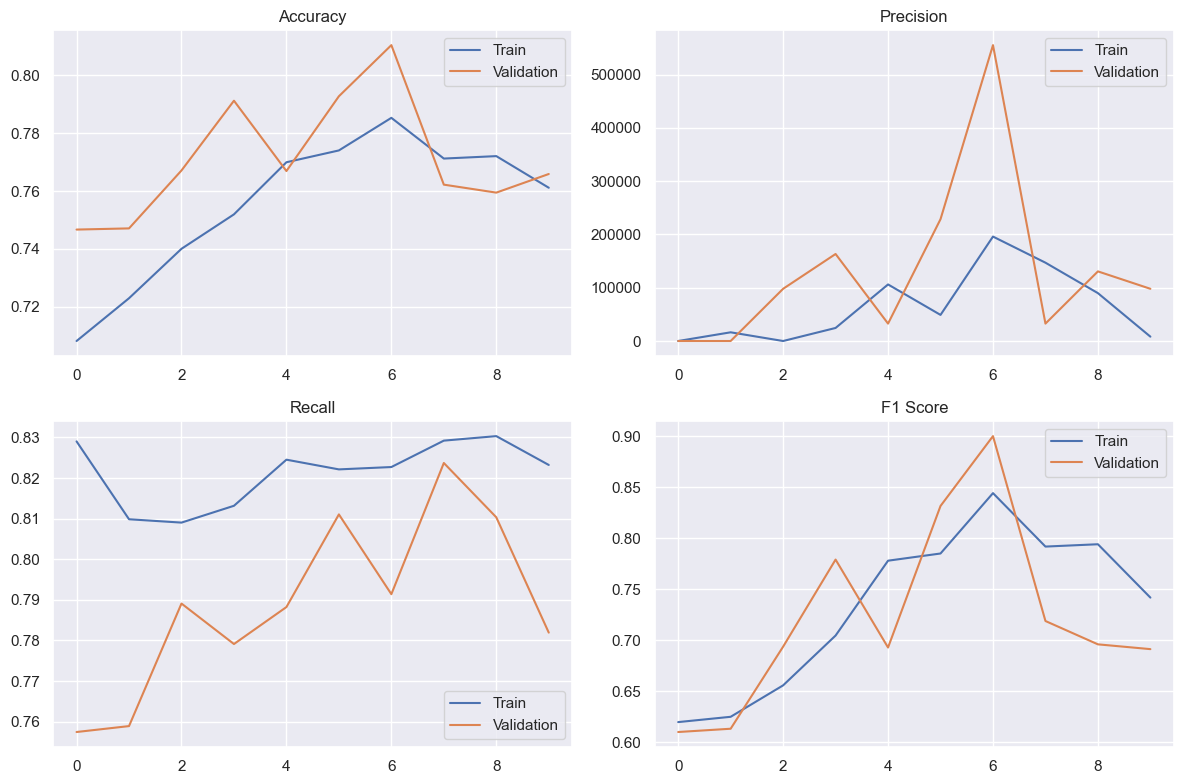

In [88]:
history = hist
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [95]:
predicted_labels =np.argmax(model.predict(X_test), axis=-1)
true_labels = np.array(y_test)

a6 = accuracy_score(true_labels, predicted_labels) * 100
p6 = precision_score(true_labels, predicted_labels,average='macro') * 100 
r6= recall_score(true_labels, predicted_labels,average='macro') * 100


306/306 [==============================] - 1s 2ms/step


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [96]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(21,))) # FC Fully Connected Layer, input_dimension is dataset input parameters
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))

In [97]:
# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score,recall_m,precision_m])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Vishnu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1224/1224 [==============================] - 9s 5ms/step - loss: 0.3817 - accuracy: 0.7223 - f1_score: 0.6526 - recall_m: 0.8117 - precision_m: 514705.8750 - val_loss: 0.3191 - val_accuracy: 0.7429 - val_f1_score: 0.6628 - val_recall_m: 0.8209 - val_precision_m: 0.6307
Epoch 2/10
1224/1224 [==============================] - 7s 6ms/step - loss: 0.2521 - accuracy: 0.7531 - f1_score: 0.7052 - recall_m: 0.8067 - precision_m: 40850.0586 - val_loss: 0.0282 - val_accuracy: 0.7438 - val_f1_score: 0.6565 - val_recall_m: 0.8073 - val_precision_m: 98039.4688
Epoch 3/10
1224/1224 [==============================] - 13s 11ms/step - loss: -1.0971 - accuracy: 0.7554 - f1_score: 0.7164 - recall_m: 0.8070 - precision_m: 89869.5781 - val_loss: -4.3130 - val_accuracy: 0.7771 - val_f1_score: 0.6906 - val_recall_m: 0.7435 - val_precision_m: 32680.5234
Epoch 4/10
1224/1224 [==============================] - 10s 8ms/step - loss: -10.8600 - accuracy: 0.7787 - f1_score: 0.8058 - recall_m: 0.8087 - pr

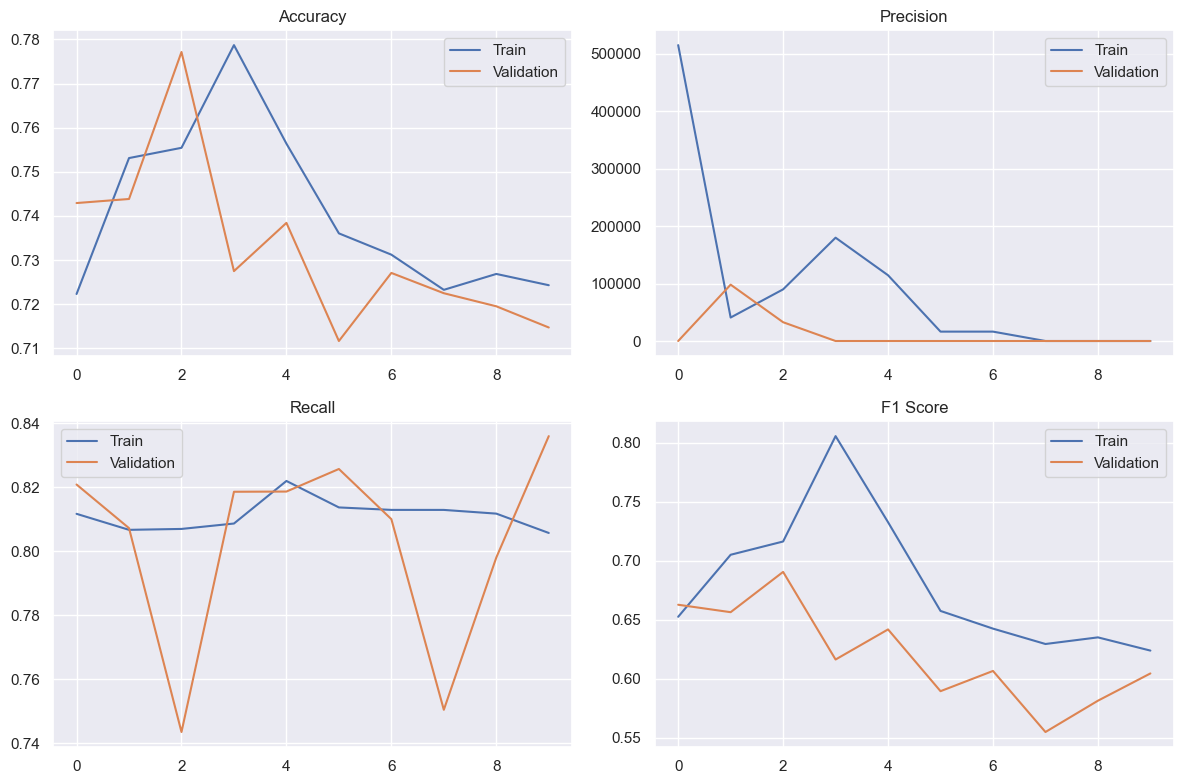

In [98]:
history = hist
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [100]:
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
true_labels = np.array(y_test)

a7 = accuracy_score(true_labels, predicted_labels) * 100
p7 = precision_score(true_labels, predicted_labels,average='macro') * 100 
r7= recall_score(true_labels, predicted_labels,average='macro') * 100


306/306 [==============================] - 1s 3ms/step


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [101]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 21), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',f1_score,recall_m,precision_m])

# Train the model
his = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1224/1224 [==============================] - 18s 10ms/step - loss: 0.3650 - accuracy: 0.7214 - f1_score: 0.6550 - recall_m: 0.8224 - precision_m: 155228.8281 - val_loss: 0.3078 - val_accuracy: 0.7377 - val_f1_score: 0.5951 - val_recall_m: 0.7659 - val_precision_m: 0.5357
Epoch 2/10
1224/1224 [==============================] - 8s 7ms/step - loss: 0.2939 - accuracy: 0.7342 - f1_score: 0.6301 - recall_m: 0.7913 - precision_m: 8170.5039 - val_loss: 0.2366 - val_accuracy: 0.7277 - val_f1_score: 0.5938 - val_recall_m: 0.7953 - val_precision_m: 0.5193
Epoch 3/10
1224/1224 [==============================] - 9s 8ms/step - loss: 0.1782 - accuracy: 0.7457 - f1_score: 0.6577 - recall_m: 0.7887 - precision_m: 16340.1211 - val_loss: 0.0044 - val_accuracy: 0.7521 - val_f1_score: 0.6568 - val_recall_m: 0.7917 - val_precision_m: 65359.8164
Epoch 4/10
1224/1224 [==============================] - 8s 6ms/step - loss: -0.3038 - accuracy: 0.7425 - f1_score: 0.6423 - recall_m: 0.7857 - precision_m

In [103]:
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
true_labels = np.array(y_test)

a8 = accuracy_score(true_labels, predicted_labels) * 100
p8 = precision_score(true_labels, predicted_labels,average='macro') * 100 
r8= recall_score(true_labels, predicted_labels,average='macro') * 100


306/306 [==============================] - 1s 3ms/step


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


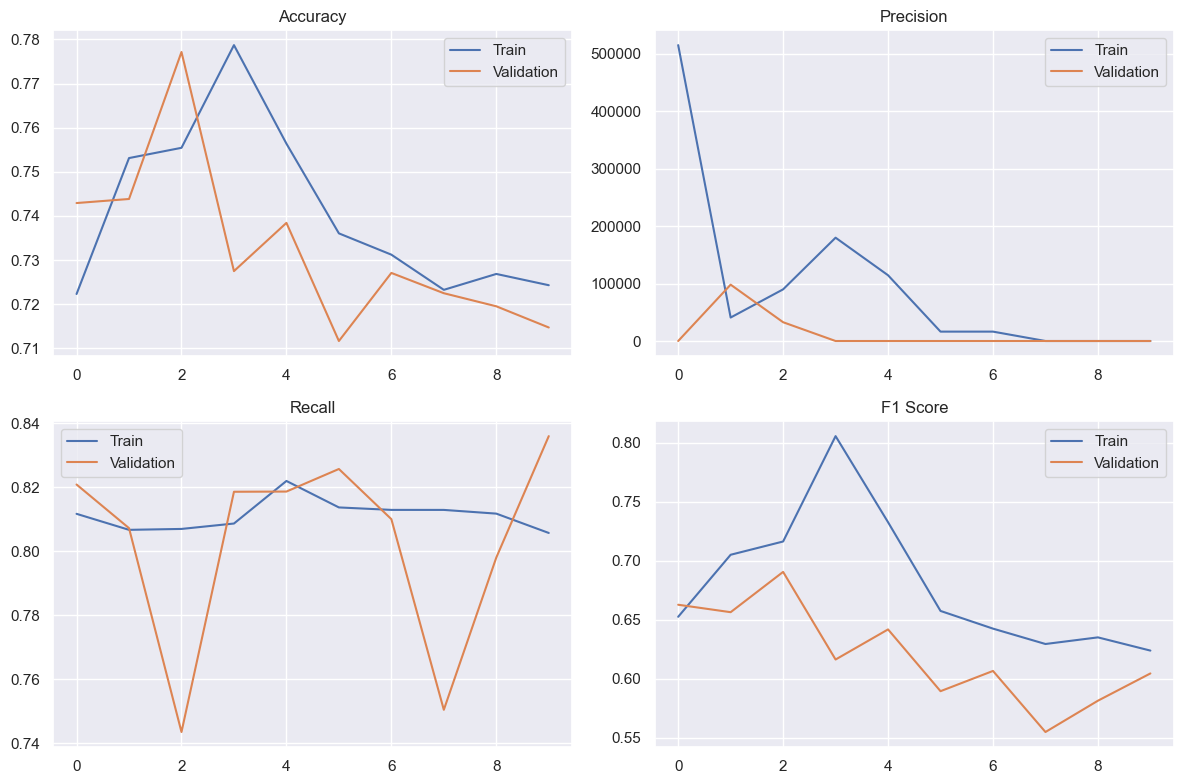

In [104]:
history = hist
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Comparison

In [105]:
results ={'Accuracy': [a,a1,a2,a3,a4,a5,a6,a7,a8],
 'Recall':[r,r1,r2,r3,r4,r5,r6 ,r7 ,r8],
 'Precision': [p,p1,p2,p3,p4,p5,p6,p7,p8]}
index = ['DT','RF','SVM','NB','KNN','Voting Classifier','ANN','CNN','LSTM']

In [106]:
results =pd.DataFrame(results,index=index)

In [107]:
print(results)

                    Accuracy     Recall  Precision
DT                 86.293535  50.000000  43.146767
RF                 86.283321  49.994082  43.146067
SVM                86.375243  57.788314  69.527589
NB                 77.724441  68.727928  62.140093
KNN                83.872945  57.811417  61.973881
Voting Classifier  84.179348  62.000468  64.812960
ANN                86.293535  50.000000  43.146767
CNN                86.293535  50.000000  43.146767
LSTM               86.293535  50.000000  43.146767


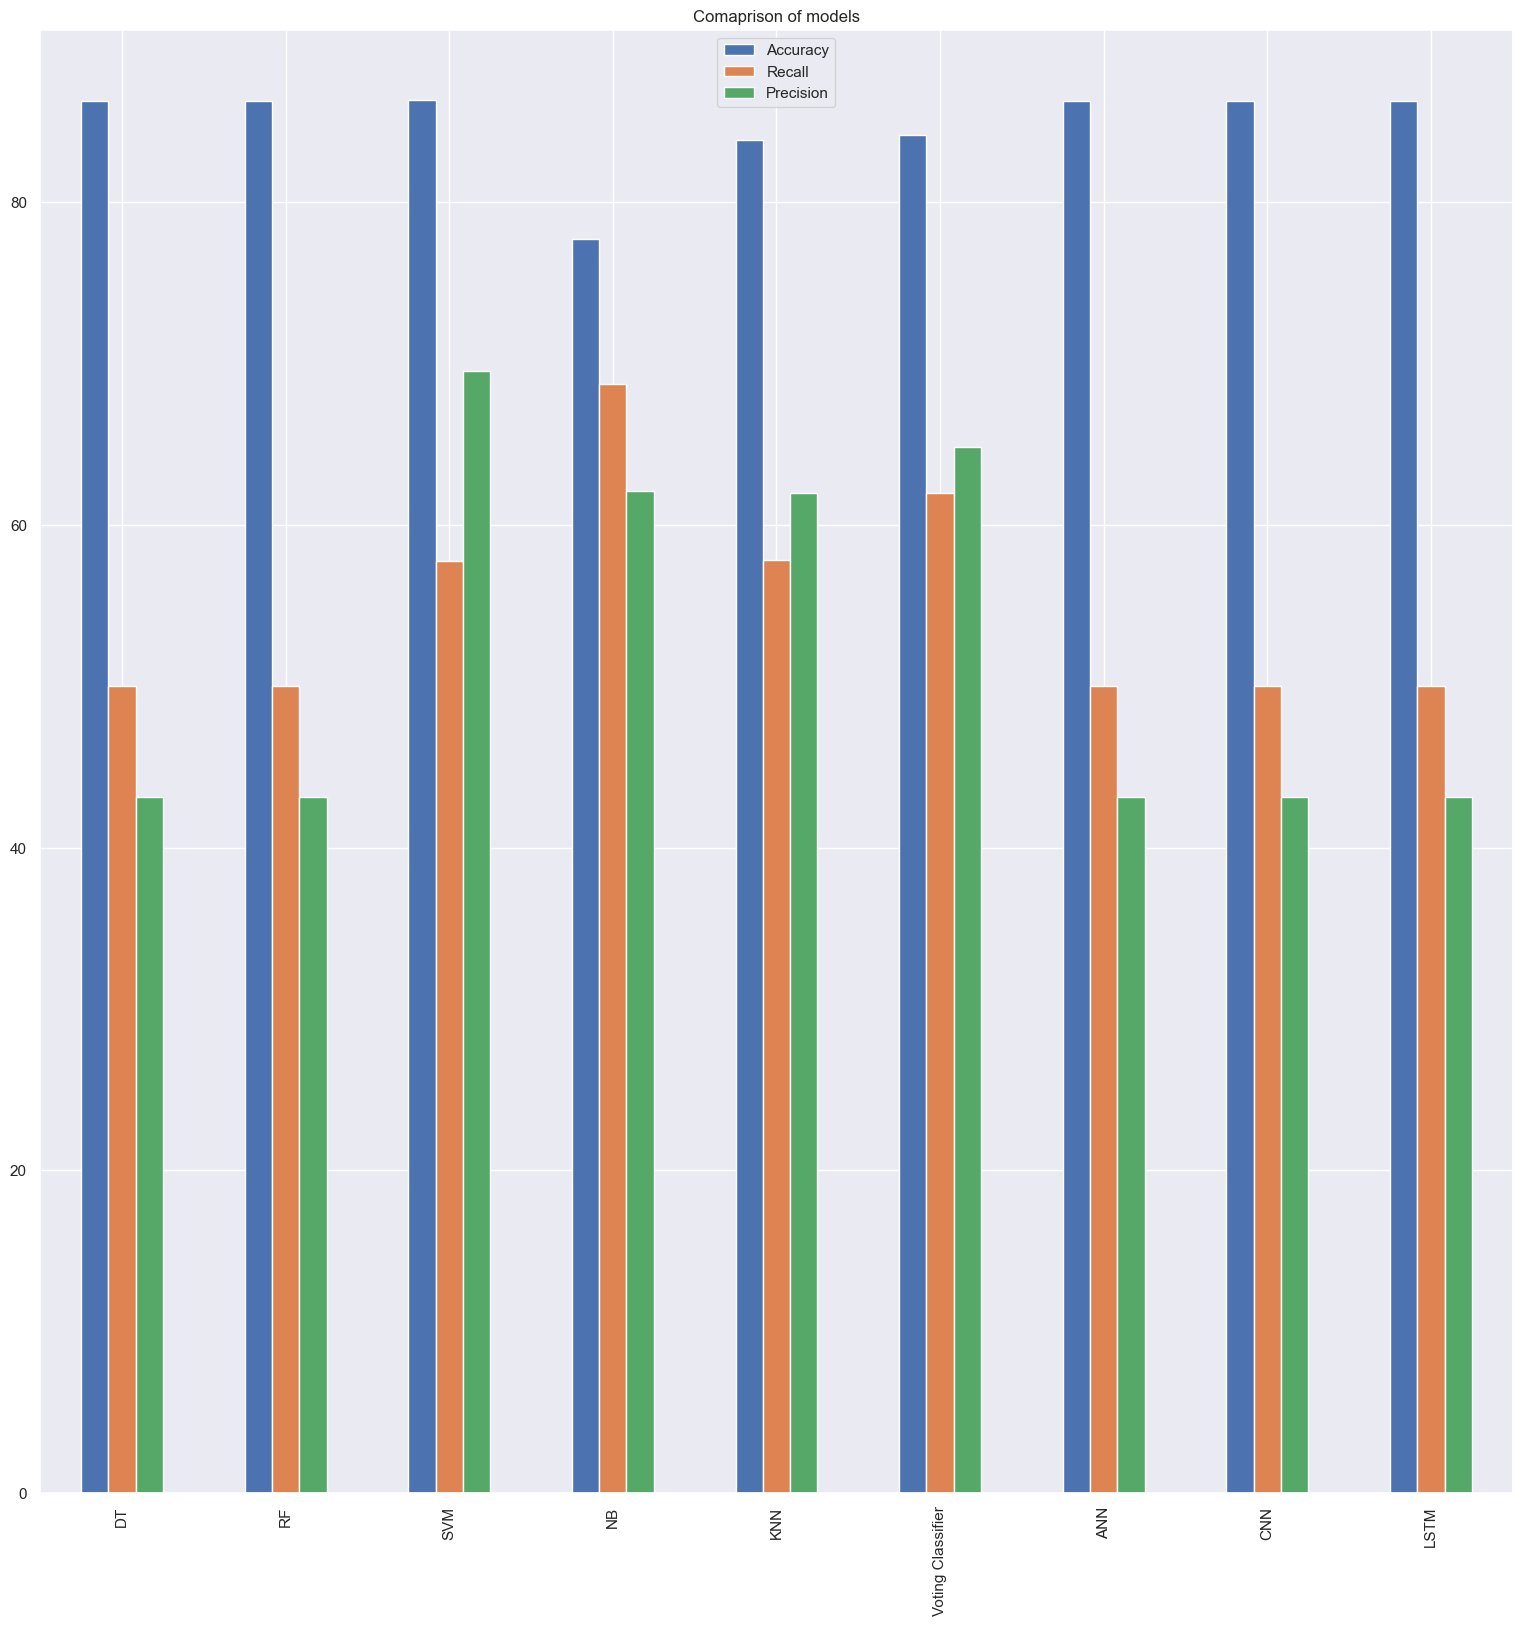

In [108]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<Axes: title={'center': 'Accuracy'}>,
       <Axes: title={'center': 'Recall'}>,
       <Axes: title={'center': 'Precision'}>], dtype=object)

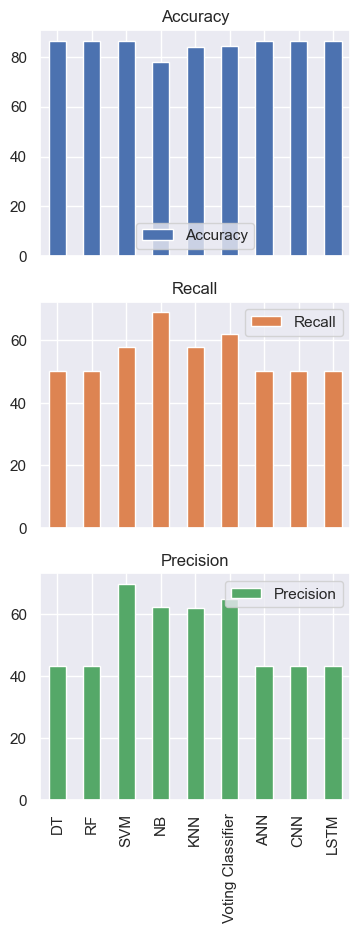

In [109]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))